In [2]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

inner_merged_df = None
try:
    vehicle_api = requests.get("http://127.0.0.1:8000/vehicle_api")
    vehicle_api.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
    vehicle_api_data = vehicle_api.json()

    vehicle_owners_api = requests.get("http://127.0.0.1:8000/vehicle_owners_api")
    vehicle_owners_api.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
    vehicle_owners_api_data = vehicle_owners_api.json()

    vdf = pd.DataFrame(vehicle_api_data["vehicles"])
    odf = pd.DataFrame(vehicle_owners_api_data["owners"])

    inner_merged_df = pd.merge(vdf, odf, on="vin", how="inner")
    inner_merged_df.head()

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from API: {e}")


Error fetching data from API: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /vehicle_api (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000214A2F0D190>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))


In [3]:
# Performing exploratory data analysis
# Display the first few rows of the DataFrame
inner_merged_df.head()

,vin,manufacturer,year,color,body_type,engine_type,transmission,fuel_type,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_name,owner_profession,owner_age,owner_district,purchase_price,purchase_date
0,QPHT622T547G7YY51,Chevrolet,1999,orange,Convertible,electric,manual,biodiesel,7,84.65,active,256.19,KANEZA Michele Phoenix,agriculturalist,65,kigali_kicukiro,256.19,2018-02-15
1,USILGOGS66KQDI8AS,Toyota,1992,black,SUV,diesel,manual,hybrid,8,57.65,active,159.80,UHIRIWE CHRISOSTOM,writer,40,west_karongi,159.80,2005-11-14
2,4H0LUVAZE5ZKU6B8C,Volkswagen,1991,blue,Wagon,diesel,automatic,hybrid,8,38.08,inactive,293.10,IRIBAGIZA Fanny,journalist,64,south_nyamagabe,293.10,2019-02-04
3,HKQU9VN0D0WYTD4P1,Toyota,1994,gray,Hatchback,petrol,manual,gasoline,3,34.99,inactive,729.63,UWUMUGISHA Heloise Rugie,engineer,53,south_kamonyi,729.63,2002-03-07
4,UC1OGL1I0CET7OHZP,Audi,2000,metallic_silver,Sedan,petrol,manual,hydrogen,5,27.93,active,418.36,NDAYISHIMIYE Gilbert,blacksmith,70,east_kirehe,418.36,2018-09-04


In [4]:
# Summary statistics for numerical columns
inner_merged_df.describe()


,year,seating_capacity,kilometers_driven,owner_age
count,300.000000,300.000000,300.00000,300.000000
mean,1995.123333,5.990000,47.34220,59.756667
std,3.168847,2.564858,28.76801,23.845324
min,1990.000000,2.000000,0.21000,18.000000
25%,1992.000000,4.000000,23.01000,40.750000
50%,1995.000000,6.000000,44.12500,61.000000
75%,1998.000000,8.000000,70.49750,80.000000
max,2000.000000,10.000000,99.87000,100.000000


In [5]:
# Get the shape of the DataFrame
print(f"Shape of the DataFrame: \n{inner_merged_df.shape}")


Shape of the DataFrame: 
(300, 18)


In [1]:
# Display unique values for categorical columns
categorical_columns = inner_merged_df.select_dtypes(include=["object"]).columns
# for col in categorical_columns:
#     unique_values = inner_merged_df[col].unique()
#     print(f"{col}: {len(unique_values)} unique values")


NameError: name 'inner_merged_df' is not defined

In [7]:
print('\n Value counts')

inner_merged_df['manufacturer'].value_counts()

for col in inner_merged_df.columns:
    print(inner_merged_df[col].value_counts())


 Value counts
vin
QPHT622T547G7YY51    1
OYV64IGWC0JDZECSS    1
QWSRKTC93Y7MPTR4H    1
0RNDMCVJGXJXQQDH7    1
UN1UILJSN0X4HSKPA    1
                    ..
VWIYPTLQ548LT1SX5    1
Q819LEYWSK10YWAKM    1
XZCJCJ3IA0NBEF1OK    1
X5CYZ50S0CG35M7GK    1
03Y6KT7Y3GRCXHQC8    1
Name: count, Length: 300, dtype: int64
manufacturer
Chevrolet     38
Audi          36
Ford          36
Toyota        33
Honda         30
Hyundai       28
BMW           27
Volkswagen    25
Nissan        24
Mercedes      23
Name: count, dtype: int64
year
2000    31
1993    31
1992    30
1991    30
1999    28
1998    28
1996    27
1997    27
1995    25
1994    23
1990    20
Name: count, dtype: int64
color
blue               24
gray               18
metallic_silver    16
black              16
orange             15
metallic_brown     15
metallic_gray      15
metallic_green     15
green              14
chrome             14
brown              14
yellow             13
gold               12
matte_black        12
metallic_black

In [8]:
# Display the column names
print(f"Column names: \n{inner_merged_df.columns.tolist()}")


Column names: 
['vin', 'manufacturer', 'year', 'color', 'body_type', 'engine_type', 'transmission', 'fuel_type', 'seating_capacity', 'kilometers_driven', 'vehicle_condition_status', 'selling_price', 'owner_name', 'owner_profession', 'owner_age', 'owner_district', 'purchase_price', 'purchase_date']


In [9]:
# Display the data types of each column
inner_merged_df.dtypes


vin                          object
manufacturer                 object
year                          int64
color                        object
body_type                    object
engine_type                  object
transmission                 object
fuel_type                    object
seating_capacity              int64
kilometers_driven           float64
vehicle_condition_status     object
selling_price                object
owner_name                   object
owner_profession             object
owner_age                     int64
owner_district               object
purchase_price               object
purchase_date                object
dtype: object

In [10]:
# Data Cleaning and Preprocessing
inner_merged_df.drop(["owner_name",'vin'], axis=1, inplace=True)
# Check for missing values 
print(inner_merged_df.isnull().sum())
# Forward fill for simplicity; you can choose other methods as needed
#inner_merged_df.ffill(inplace=True)


manufacturer                0
year                        0
color                       0
body_type                   0
engine_type                 0
transmission                0
fuel_type                   0
seating_capacity            0
kilometers_driven           0
vehicle_condition_status    0
selling_price               0
owner_profession            0
owner_age                   0
owner_district              0
purchase_price              0
purchase_date               0
dtype: int64


In [11]:
inner_merged_df.dtypes

manufacturer                 object
year                          int64
color                        object
body_type                    object
engine_type                  object
transmission                 object
fuel_type                    object
seating_capacity              int64
kilometers_driven           float64
vehicle_condition_status     object
selling_price                object
owner_profession             object
owner_age                     int64
owner_district               object
purchase_price               object
purchase_date                object
dtype: object

In [12]:
    # Convert Data Types
    """errors parameter can contain {
    raise: (default) raises an error for invalid parsing.
    coerce: converts invalid parsing to NaN
    ignore: returns the original data without any changes
    } """
    
    inner_merged_df['selling_price'] = inner_merged_df['selling_price'].astype(float)
    inner_merged_df["purchase_price"] = pd.to_numeric(inner_merged_df["purchase_price"], errors="coerce", downcast="float")
    inner_merged_df["purchase_date"] = pd.to_datetime(inner_merged_df["purchase_date"], errors="coerce")
    inner_merged_df.dtypes

manufacturer                        object
year                                 int64
color                               object
body_type                           object
engine_type                         object
transmission                        object
fuel_type                           object
seating_capacity                     int64
kilometers_driven                  float64
vehicle_condition_status            object
selling_price                      float64
owner_profession                    object
owner_age                            int64
owner_district                      object
purchase_price                     float32
purchase_date               datetime64[ns]
dtype: object

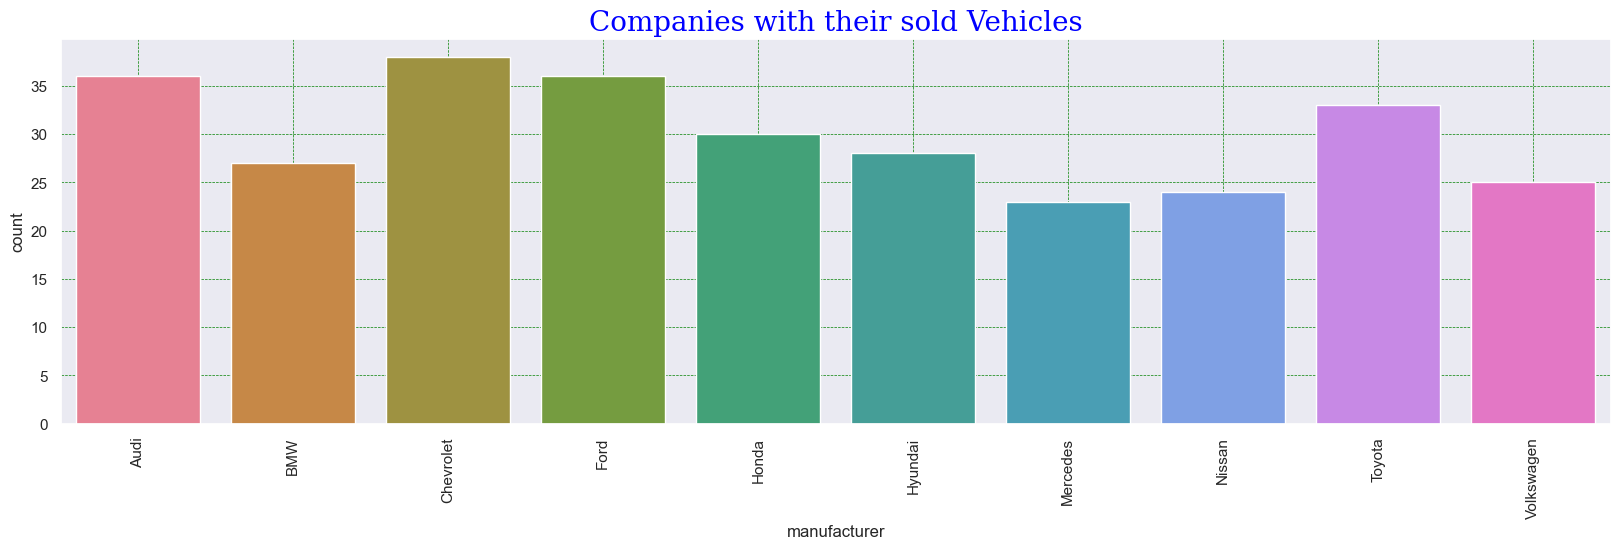

In [13]:
plt.figure(figsize = (20, 5))
sns.countplot(x='manufacturer', data=inner_merged_df.sort_values(by='manufacturer'), hue='manufacturer', palette='husl', legend=False)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Companies with their sold Vehicles", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xticks(rotation=90)  # Optional: Rotate x labels for better visibility
plt.show()

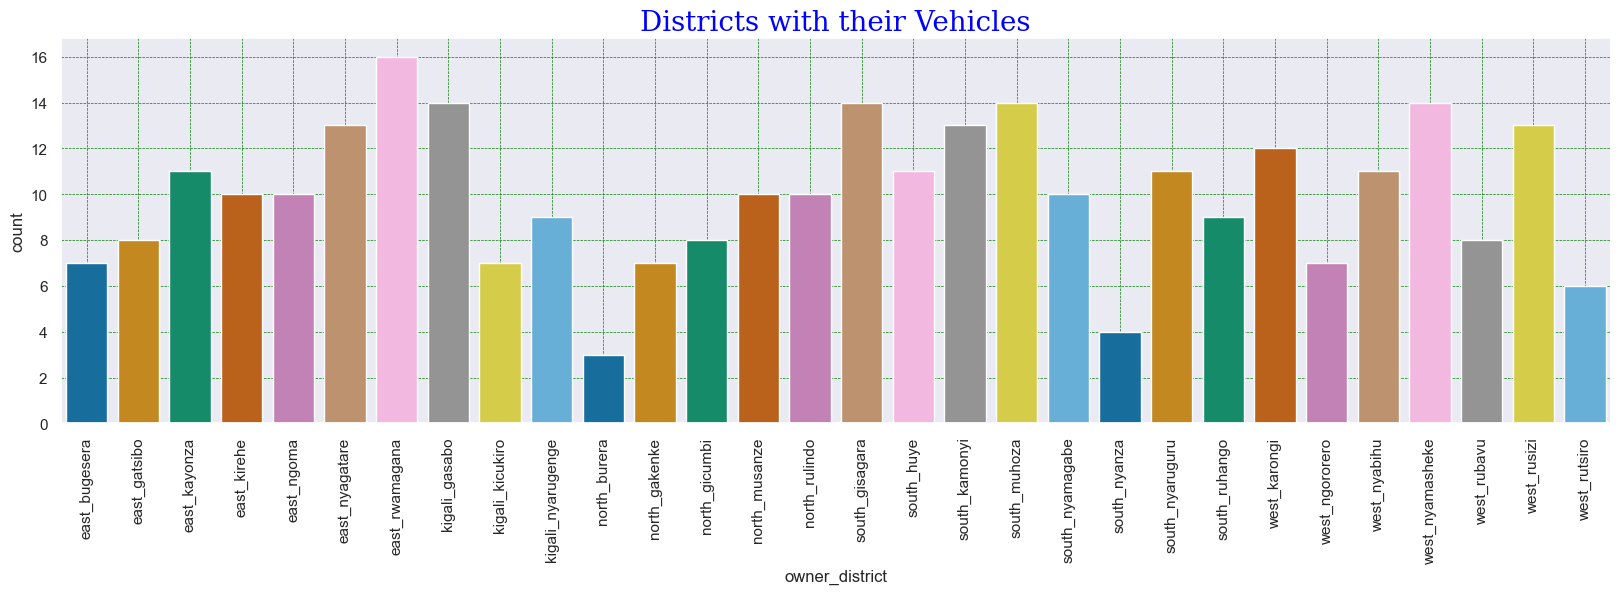

In [14]:
plt.figure(figsize = (20, 5))
sns.countplot(x='owner_district', data=inner_merged_df.sort_values(by='owner_district'), hue='owner_district', palette='colorblind', legend=False)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Districts with their Vehicles", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xticks(rotation=90)  # Optional: Rotate x labels for better visibility
plt.show()

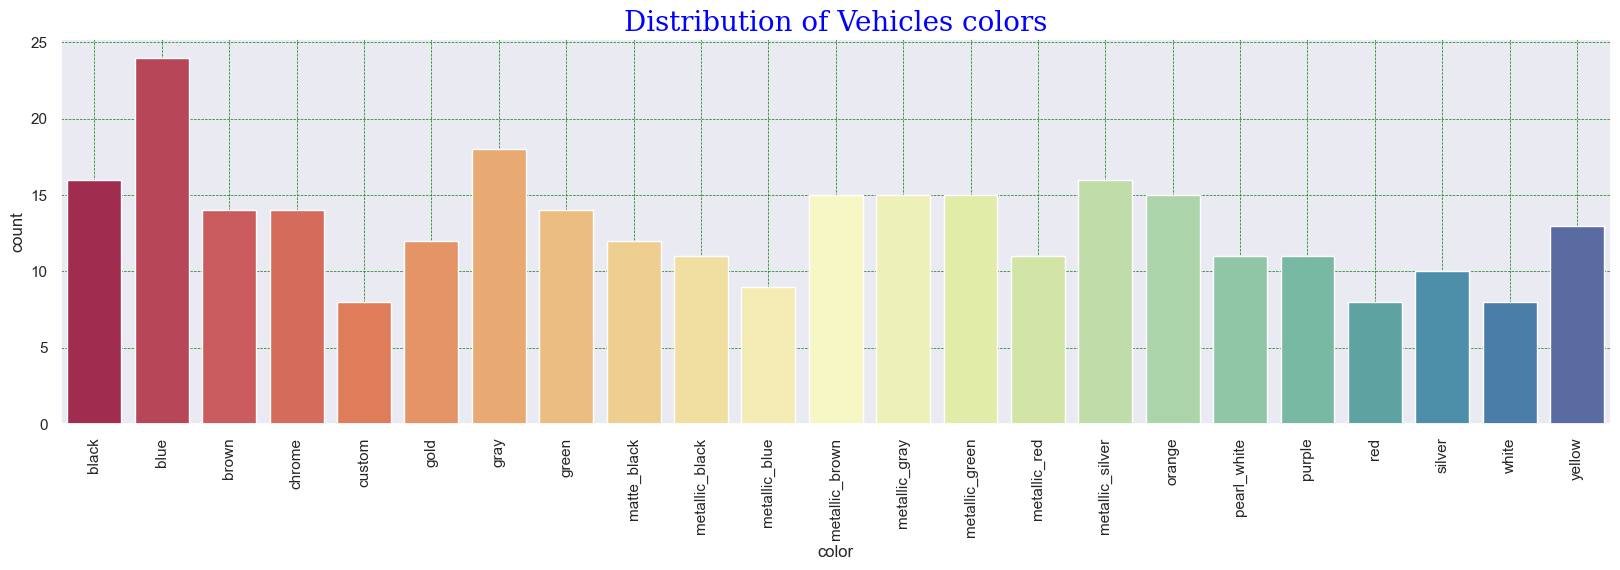

In [15]:
plt.figure(figsize = (20, 5))
sns.countplot(x='color', data=inner_merged_df.sort_values(by='color'), hue='color', palette='Spectral', legend=False)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Distribution of Vehicles colors", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xticks(rotation=90)  # Optional: Rotate x labels for better visibility
plt.show()

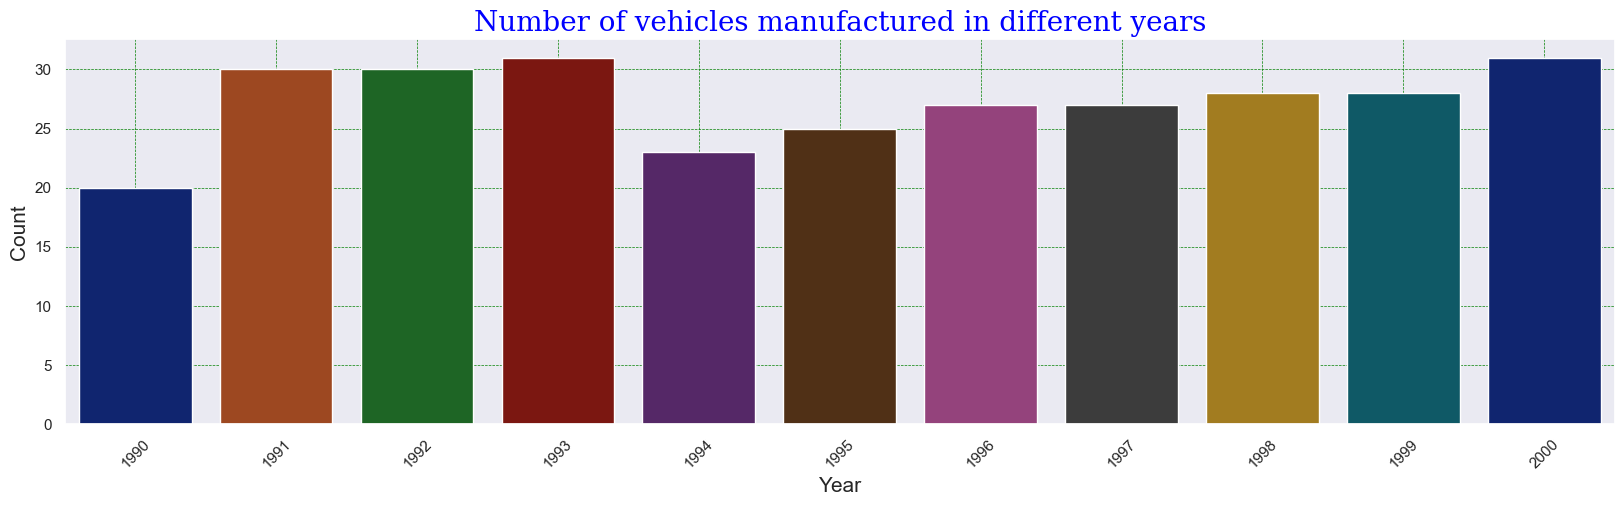

In [16]:
# Assuming 'car_data' is your DataFrame and 'Year' is the column to count
plt.figure(figsize=(20, 5))
sns.countplot(x='year', data=inner_merged_df, hue='year', palette='dark', legend=False)  # Use 'x' for the column
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Number of vehicles manufactured in different years", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xlabel("Year", fontsize=15)  # Optional: Label for the x-axis
plt.ylabel("Count", fontsize=15)  # Optional: Label for the y-axis
plt.xticks(rotation=45)  # Optional: Rotate x labels for better visibility
plt.show()

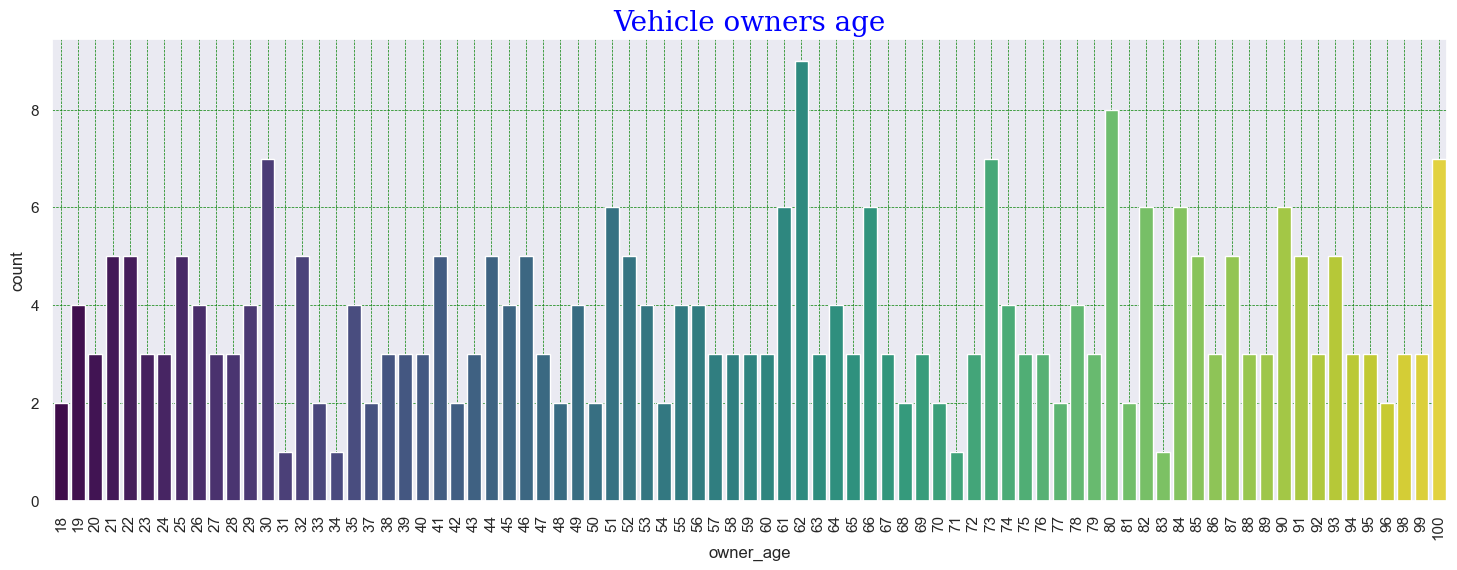

In [17]:
plt.figure(figsize=(18, 6))
sns.countplot(x='owner_age', data=inner_merged_df, hue='owner_age', palette='viridis', legend=False)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Vehicle owners age", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xticks(rotation=90)  # Optional: Rotate x labels for better visibility
plt.show()

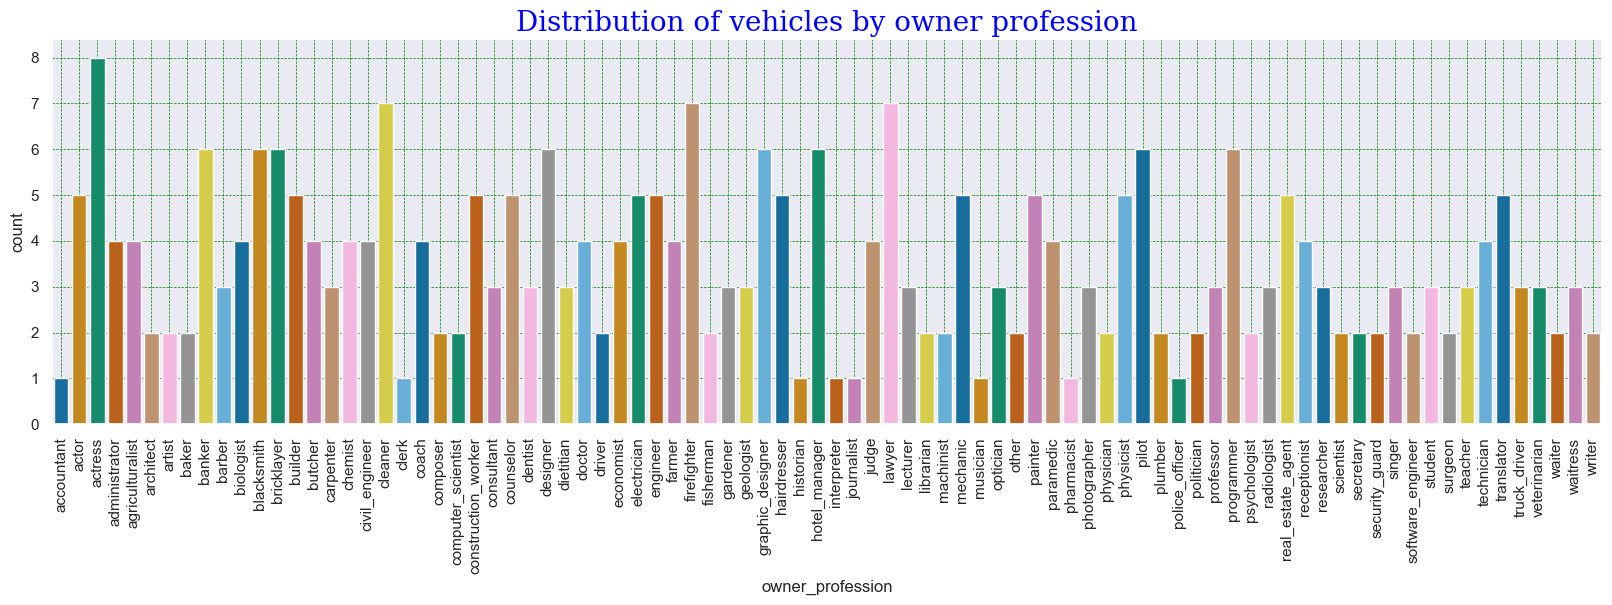

In [18]:
plt.figure(figsize = (20, 5))
sns.countplot(x='owner_profession', data=inner_merged_df.sort_values(by='owner_profession'), hue='owner_profession', palette='colorblind', legend=False)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Distribution of vehicles by owner profession", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xticks(rotation=90)  # Optional: Rotate x labels for better visibility
plt.show()

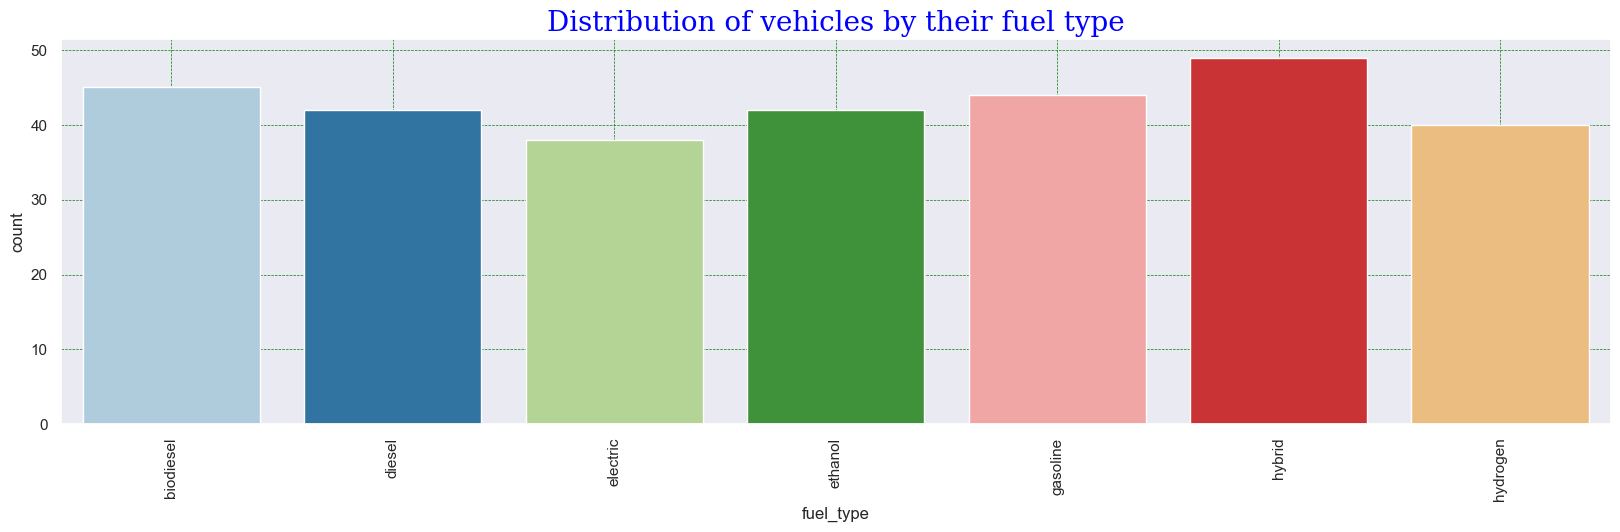

In [19]:
plt.figure(figsize = (20, 5))
sns.countplot(x='fuel_type', data=inner_merged_df.sort_values(by='fuel_type'), hue='fuel_type', palette='Paired', legend=False)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Distribution of vehicles by their fuel type", fontdict={"family": "serif", "color": "blue", "size": 20})
plt.xticks(rotation=90)  # Optional: Rotate x labels for better visibility
plt.show()

In [20]:
inner_merged_df.nunique()

manufacturer                 10
year                         11
color                        23
body_type                     8
engine_type                   3
transmission                  2
fuel_type                     7
seating_capacity              9
kilometers_driven           296
vehicle_condition_status      2
selling_price               300
owner_profession             86
owner_age                    81
owner_district               30
purchase_price              300
purchase_date               293
dtype: int64

In [21]:

inner_merged_df.groupby('manufacturer').agg({
    'seating_capacity': ['min', 'max', 'mean', 'std', 'first', 'last'],
    'selling_price': ['min', 'max', 'mean', 'std', 'sum'],
    'purchase_price': ['min', 'max', 'mean', 'std', 'sum']
})


seating_capacity                                     \
                          min max      mean       std first last   
manufacturer                                                       
Audi                        2  10  6.222222  2.531077     5    2   
BMW                         2  10  6.666667  2.586949     9    7   
Chevrolet                   2  10  5.526316  2.424390     7    7   
Ford                        2  10  5.694444  2.616644     4   10   
Honda                       2  10  6.000000  2.491364     4    4   
Hyundai                     2  10  5.392857  2.739820    10    6   
Mercedes                    2  10  5.826087  2.902228    10    2   
Nissan                      2  10  5.833333  2.869126     4    6   
Toyota                      3  10  6.515152  2.032874     8    4   
Volkswagen                  2  10  6.320000  2.688246     8    2   

             selling_price                                             \
                       min      max        mean         std       sum   
manufacturer                                                            
Audi                 88.36  2000.12  554.322778  350.152216  19955.62   
BMW                 168.25   992.13  569.700741  255.918295  15381.92   
Chevrolet           135.29   992.28  602.965526  259.899726  22912.69   
Ford                133.47   975.05  608.697778  261.443790  21913.12   
Honda               212.83   997.24  550.010667  250.098030  16500.32   
Hyundai             206.41   955.24  595.131786  197.512169  16663.69   
Mercedes            240.94   970.38  600.273043  226.398335  13806.28   
Nissan               37.69   971.00  553.073333  232.098189  13273.76   
Toyota               42.06   951.89  549.473939  280.727469  18132.64   
Volkswagen          123.79   998.44  603.962800  254.042396  15099.07   

             purchase_price                                                     
                        min          max        mean         std           sum  
manufacturer                                                                    
Audi             125.400002   988.150024  563.035522  279.758362  20269.279297  
BMW              169.580002  1050.540039  633.928162  276.916565  17116.060547  
Chevrolet        159.580002  1188.859985  684.278931  275.601929  26002.599609  
Ford             153.250000  1129.859985  666.085815  273.971832  23979.089844  
Honda            248.699997  1096.709961  634.245972  252.430511  19027.378906  
Hyundai          245.350006  1007.690002  656.353943  183.826248  18377.910156  
Mercedes         240.940002  1104.530029  650.434753  246.638077  14960.000000  
Nissan            37.689999  1058.969971  616.537903  256.950378  14796.910156  
Toyota            42.060001  1056.339966  597.961853  303.008911  19732.740234  
Volkswagen       171.289993  1049.010010  642.688416  254.068863  16067.209961

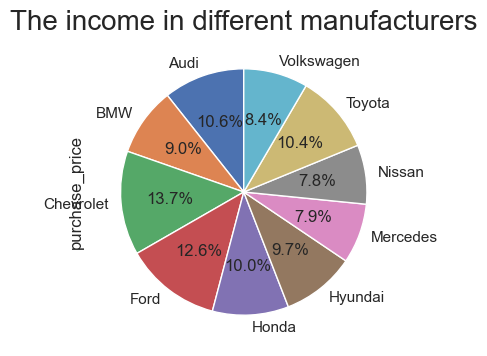

In [22]:
plt.figure(figsize = (15, 4))
inner_merged_df.groupby('manufacturer')['purchase_price'].sum().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title("The income in different manufacturers", fontsize = 20)
plt.show()

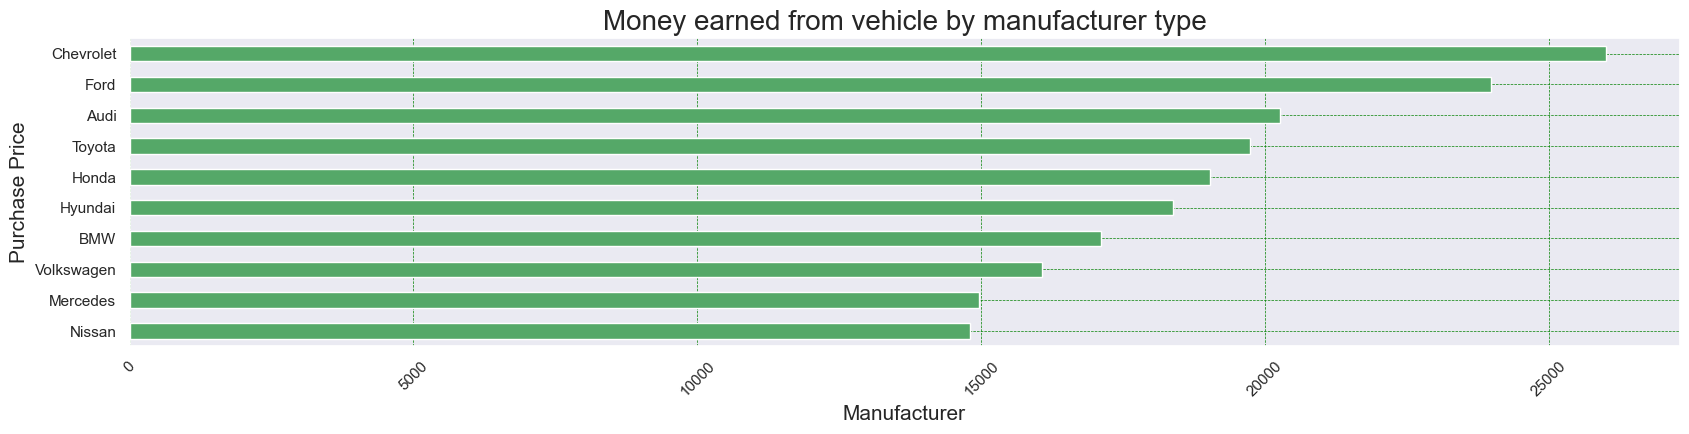

In [23]:
plt.figure(figsize=(20, 4))
earned_by_manufacturer = inner_merged_df.groupby('manufacturer')['purchase_price'].sum().sort_values(ascending = True).plot(kind='barh', color='g')
plt.title("Money earned from vehicle by manufacturer type", fontsize=20)
plt.xlabel("Manufacturer", fontsize=15)
plt.ylabel("Purchase Price", fontsize=15)
plt.xticks(rotation=45)  # Rotate x-tick labels for better visibility
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.show()

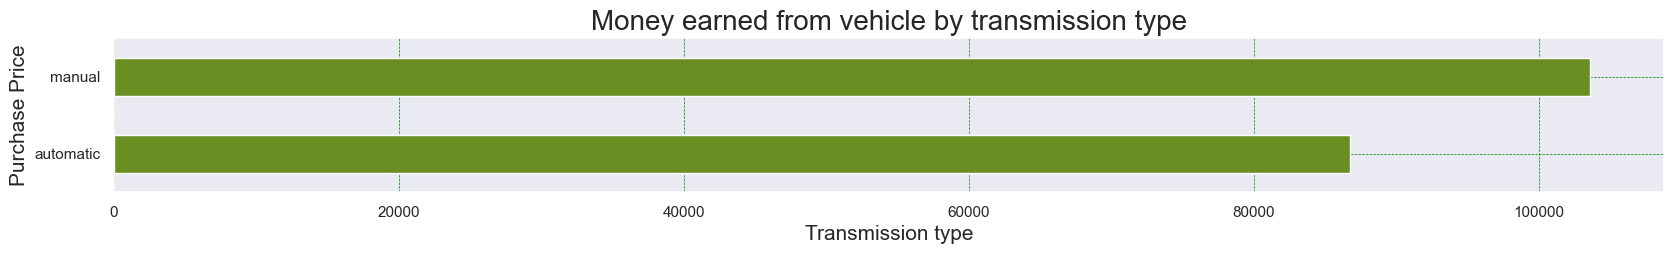

In [24]:
plt.figure(figsize=(20, 2))
earned_by_manufacturer = inner_merged_df.groupby('transmission')['purchase_price'].sum().plot(kind = 'barh', color = 'olivedrab')
plt.title("Money earned from vehicle by transmission type", fontsize=20)
plt.xlabel("Transmission type", fontsize=15)
plt.ylabel("Purchase Price", fontsize=15)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.show()

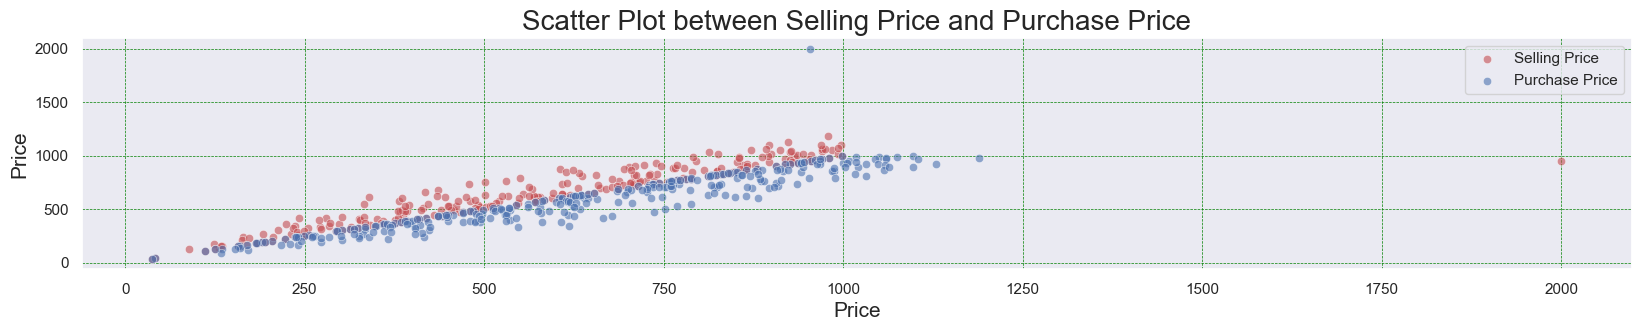

In [25]:
plt.figure(figsize=(20, 3))
# Create scatter plot for selling_price
sns.scatterplot(x='selling_price', y='purchase_price', data=inner_merged_df, color='r', label='Selling Price', alpha=0.6)
# Create scatter plot for purchase_price
sns.scatterplot(x='purchase_price', y='selling_price', data=inner_merged_df, color='b', label='Purchase Price', alpha=0.6)
plt.title("Scatter Plot between Selling Price and Purchase Price", fontsize=20)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.xlabel("Price", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.legend()
plt.show()

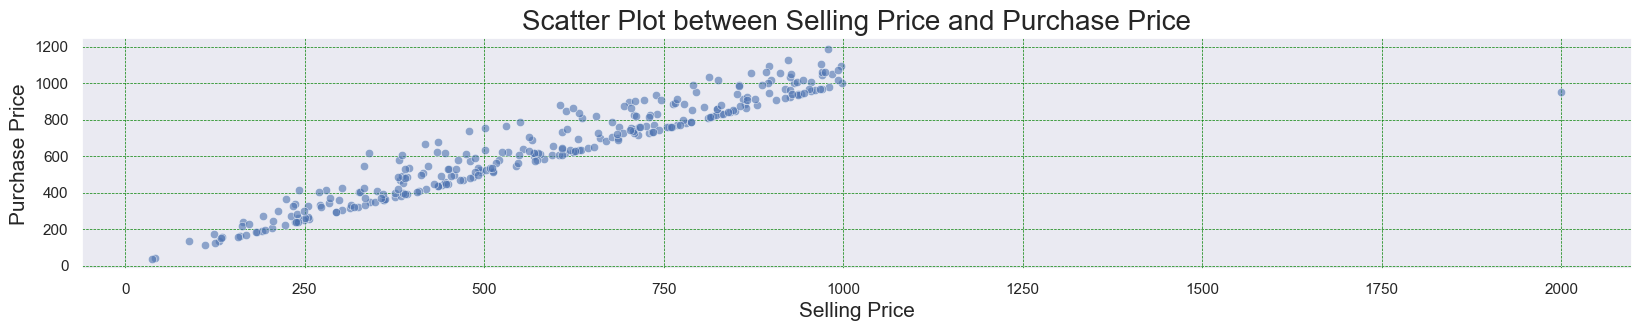

In [26]:
plt.figure(figsize=(20, 3))
# Create the scatter plot for selling_price vs. purchase_price
sns.scatterplot(x='selling_price', y='purchase_price', data=inner_merged_df, color='b', alpha=0.6)
plt.title("Scatter Plot between Selling Price and Purchase Price", fontsize=20)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.xlabel("Selling Price", fontsize=15)
plt.ylabel("Purchase Price", fontsize=15)
plt.show()

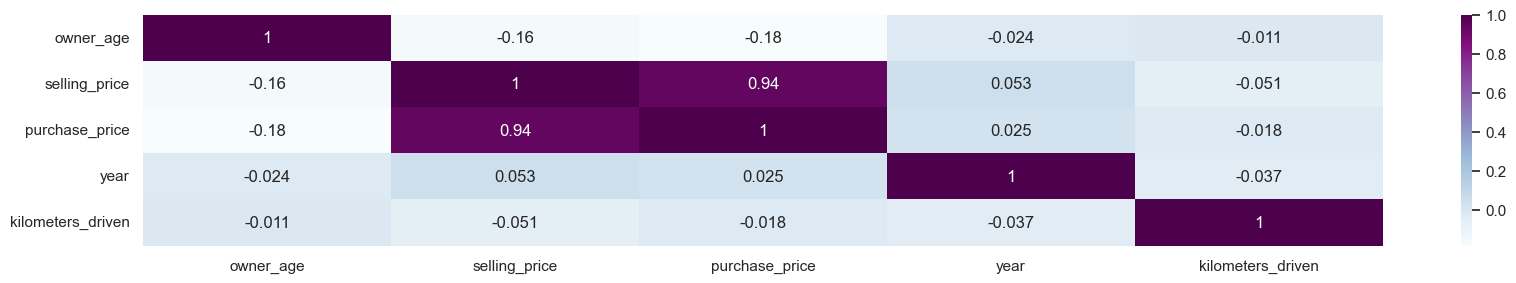

In [27]:
plt.figure(figsize = (20, 3))
numeric_columns = ['owner_age', 'selling_price', 'purchase_price', 'year', 'kilometers_driven']
heatmap_data = inner_merged_df[numeric_columns].corr()
sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)
plt.show()

In [28]:
print('Correlation between selling_price and kilometers_driven:', inner_merged_df['selling_price'].corr(inner_merged_df['kilometers_driven']))

Correlation between selling_price and kilometers_driven: -0.05145279454179889


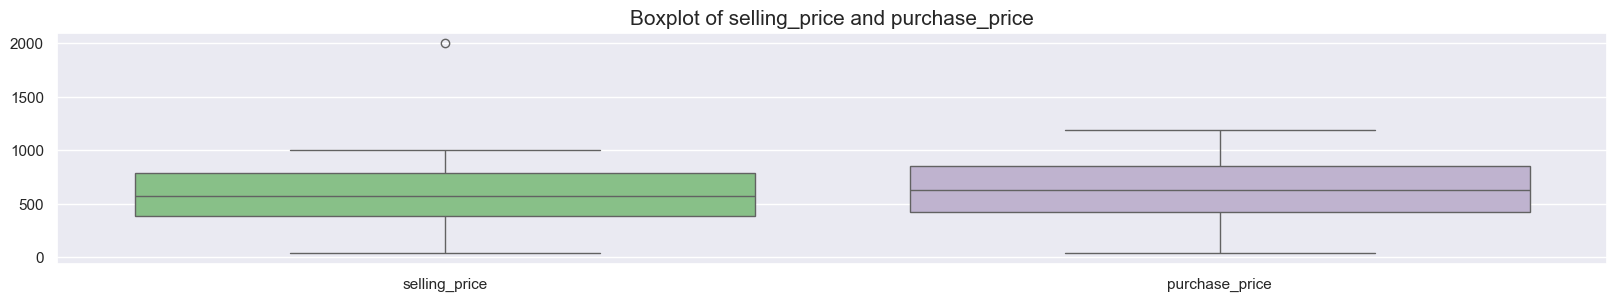

In [29]:
plt.figure(figsize = (20, 3))
sns.boxplot(data = inner_merged_df[['selling_price', 'purchase_price']], palette = 'Accent')
plt.title("Boxplot of selling_price and purchase_price", fontsize = 15)
plt.show()

In [30]:
# Return all outliers (greater than 1500 or less than 0)
inner_merged_df[inner_merged_df['selling_price'] > 1500]

,manufacturer,year,color,body_type,engine_type,transmission,fuel_type,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_profession,owner_age,owner_district,purchase_price,purchase_date
299,Audi,2000,matte_black,Coupe,electric,automatic,gasoline,2,2.12,active,2000.12,surgeon,58,west_rutsiro,953.98999,2023-10-22


In [31]:
# Remove outliers from the original DataFrame
inner_merged_df = inner_merged_df[inner_merged_df['selling_price'] < 1500]

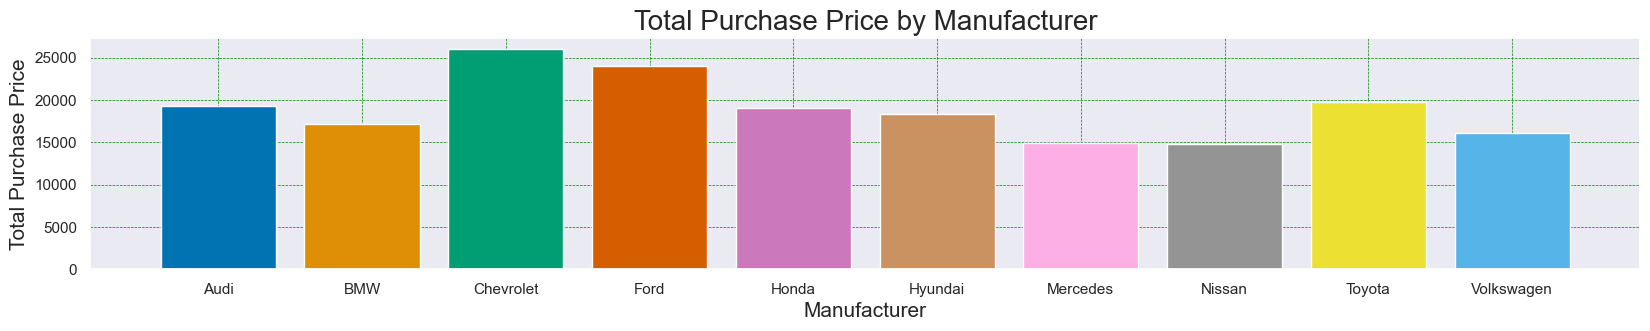

In [32]:
purchase_price_sum = inner_merged_df.groupby('manufacturer')['purchase_price'].sum()
plt.figure(figsize=(20, 3))
plt.bar(purchase_price_sum.index, purchase_price_sum.values, color=sns.color_palette("colorblind", len(purchase_price_sum)))
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Total Purchase Price by Manufacturer", fontsize=20)
plt.xlabel("Manufacturer", fontsize=15)
plt.ylabel("Total Purchase Price", fontsize=15)
plt.show()

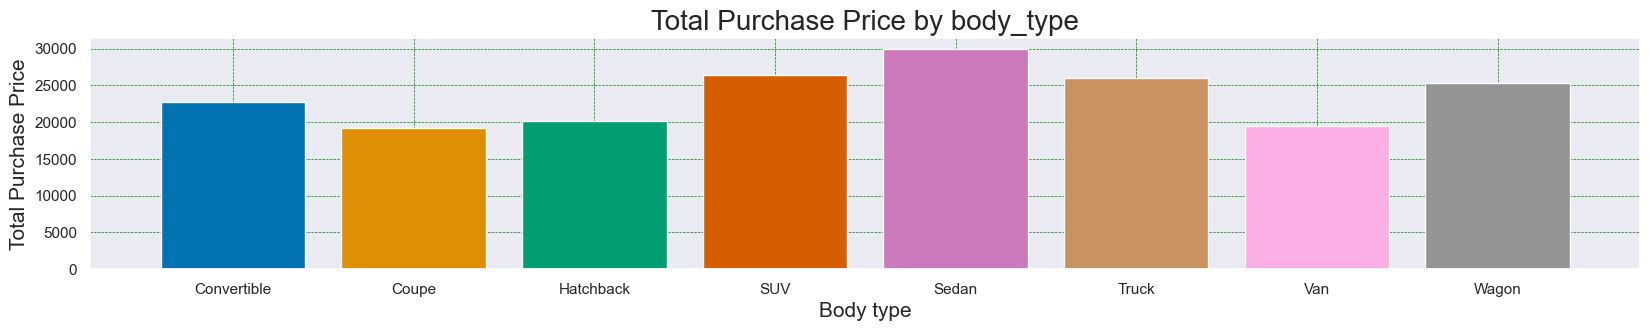

In [33]:

purchase_price_sum = inner_merged_df.groupby('body_type')['purchase_price'].sum()
plt.figure(figsize=(20, 3))
plt.bar(purchase_price_sum.index, purchase_price_sum.values, color=sns.color_palette("colorblind", len(purchase_price_sum)))
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Total Purchase Price by body_type", fontsize=20)
plt.xlabel("Body type", fontsize=15)
plt.ylabel("Total Purchase Price", fontsize=15)
plt.show()


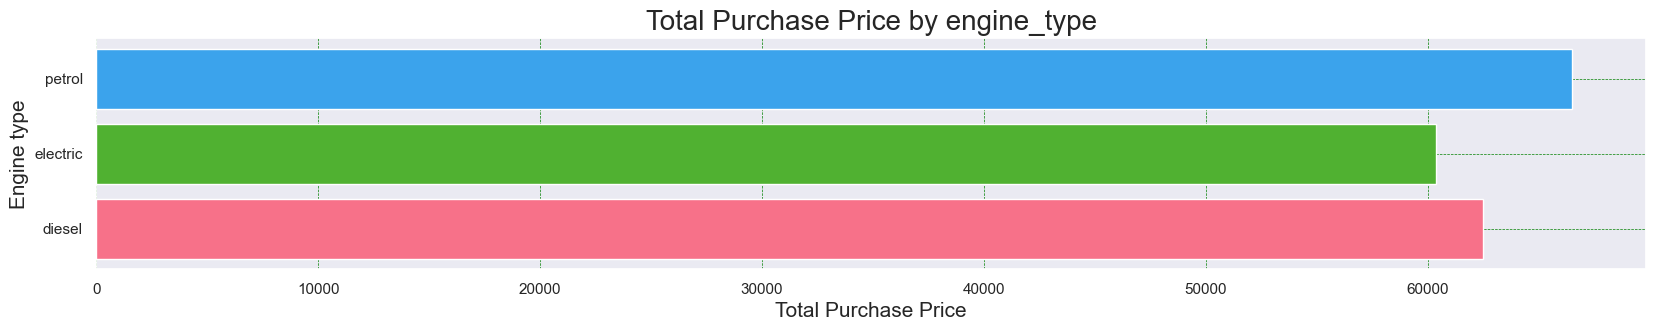

In [34]:

purchase_price_sum = inner_merged_df.groupby('engine_type')['purchase_price'].sum()
plt.figure(figsize=(20, 3))
plt.barh(purchase_price_sum.index, purchase_price_sum.values, color=sns.color_palette("husl", len(purchase_price_sum)))
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Total Purchase Price by engine_type", fontsize=20)
plt.ylabel("Engine type", fontsize=15)
plt.xlabel("Total Purchase Price", fontsize=15)
plt.show()


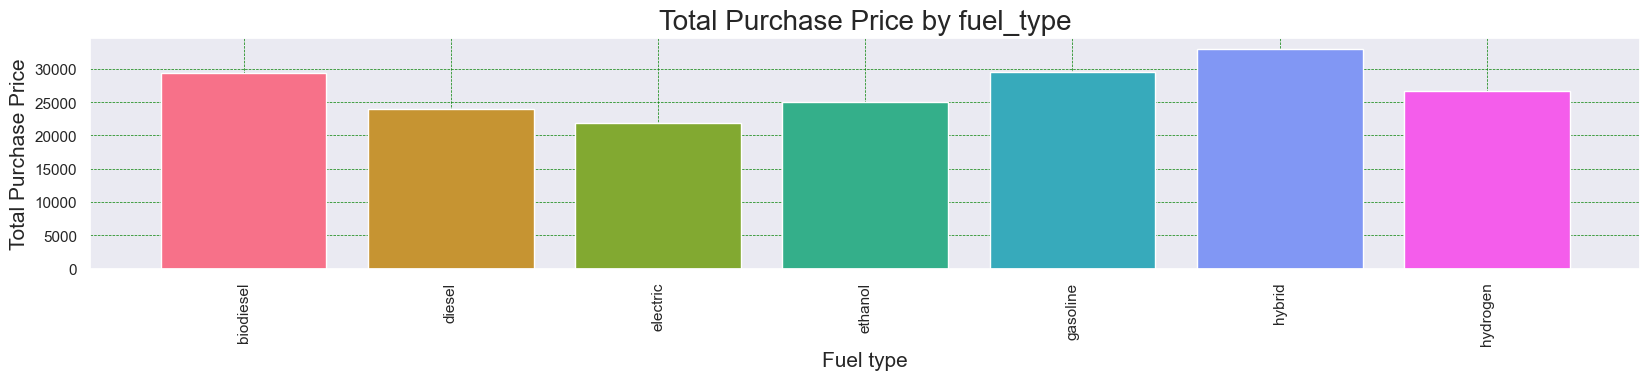

In [35]:

purchase_price_sum = inner_merged_df.groupby('fuel_type')['purchase_price'].sum()
plt.figure(figsize=(20, 3))
plt.bar(purchase_price_sum.index, purchase_price_sum.values, color=sns.color_palette("husl", len(purchase_price_sum)))
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Total Purchase Price by fuel_type", fontsize=20)
plt.xlabel("Fuel type", fontsize=15)
plt.ylabel("Total Purchase Price", fontsize=15)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

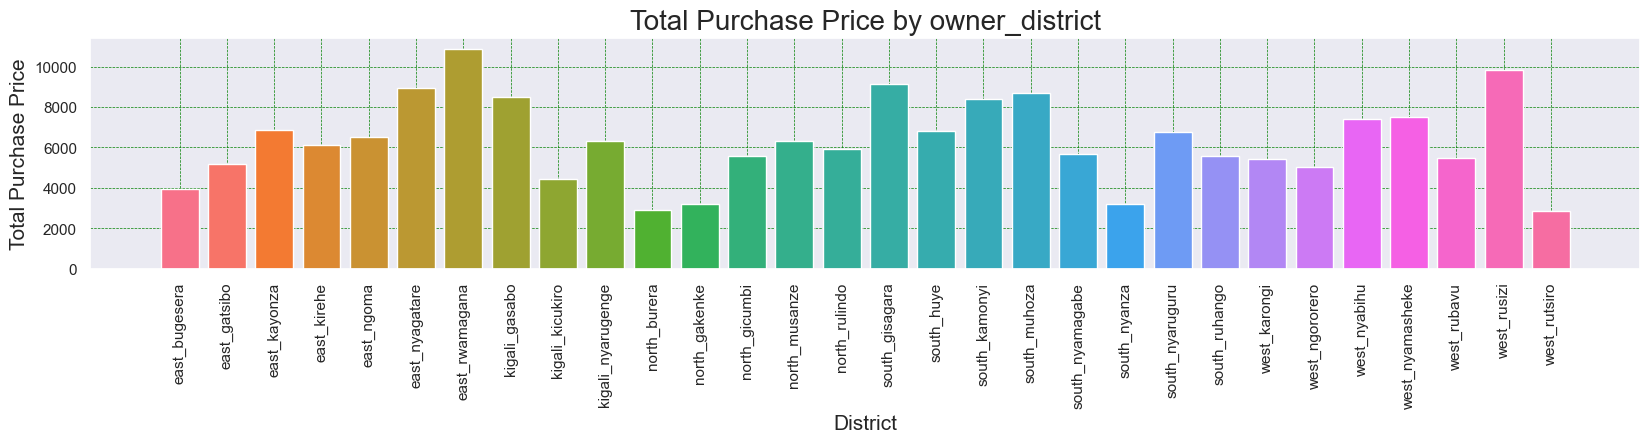

In [36]:

purchase_price_sum = inner_merged_df.groupby('owner_district')['purchase_price'].sum()
plt.figure(figsize=(20, 3))
plt.bar(purchase_price_sum.index, purchase_price_sum.values, color=sns.color_palette("husl", len(purchase_price_sum)))
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Total Purchase Price by owner_district", fontsize=20)
plt.xlabel("District", fontsize=15)
plt.ylabel("Total Purchase Price", fontsize=15)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

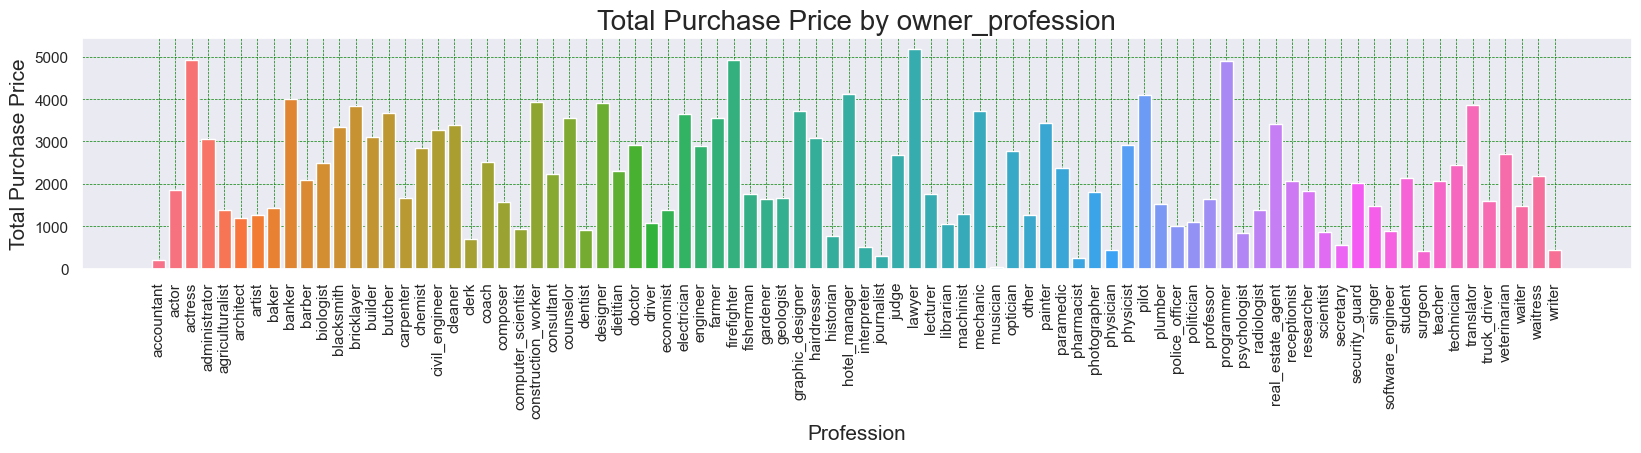

In [37]:

purchase_price_sum = inner_merged_df.groupby('owner_profession')['purchase_price'].sum()
plt.figure(figsize=(20, 3))
plt.bar(purchase_price_sum.index, purchase_price_sum.values, color=sns.color_palette("husl", len(purchase_price_sum)))
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Total Purchase Price by owner_profession", fontsize=20)
plt.xlabel("Profession", fontsize=15)
plt.ylabel("Total Purchase Price", fontsize=15)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

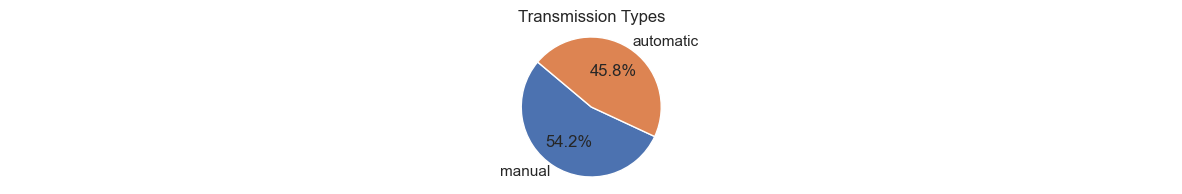

In [38]:
transmission_counts = inner_merged_df['transmission'].value_counts()
# Plotting the transmission types as a pie chart
plt.figure(figsize = (15, 2))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types')
plt.axis('equal')
plt.show()

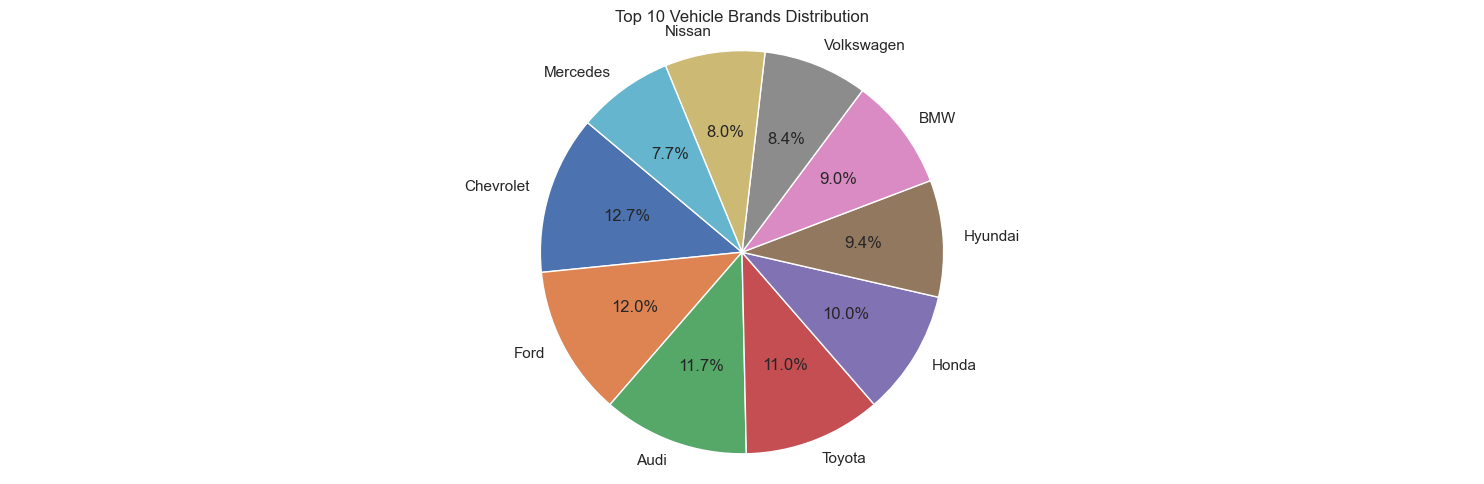

In [39]:
brand_distribution = inner_merged_df['manufacturer'].value_counts()
top_10_brands = brand_distribution.head(10)
plt.figure(figsize = (15, 5))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

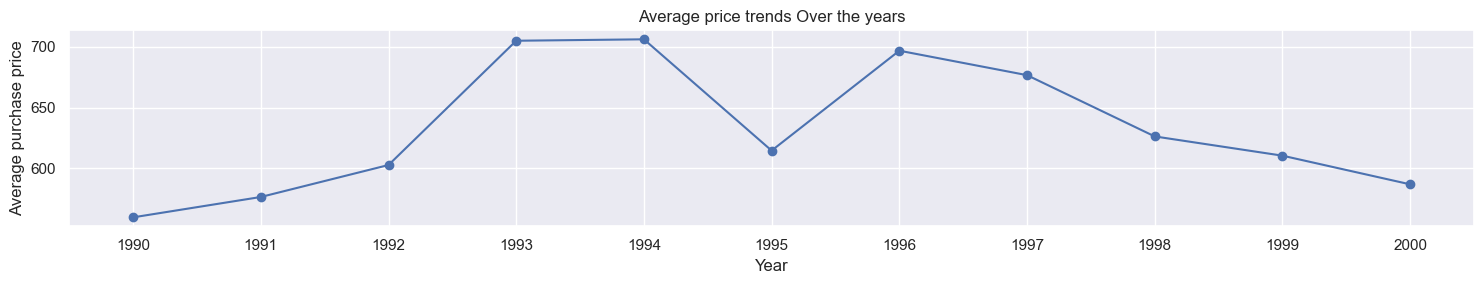

In [40]:
price_trends = inner_merged_df.groupby('year')['purchase_price'].mean().reset_index()
price_trends = price_trends.sort_values(by='year')
plt.figure(figsize=(15, 3))
plt.plot(price_trends['year'], price_trends['purchase_price'], marker='o', linestyle='-')
plt.title('Average price trends Over the years')
plt.xlabel('Year')
plt.ylabel('Average purchase price')
plt.grid(True)
plt.xticks(price_trends['year'])
plt.tight_layout()
plt.show()

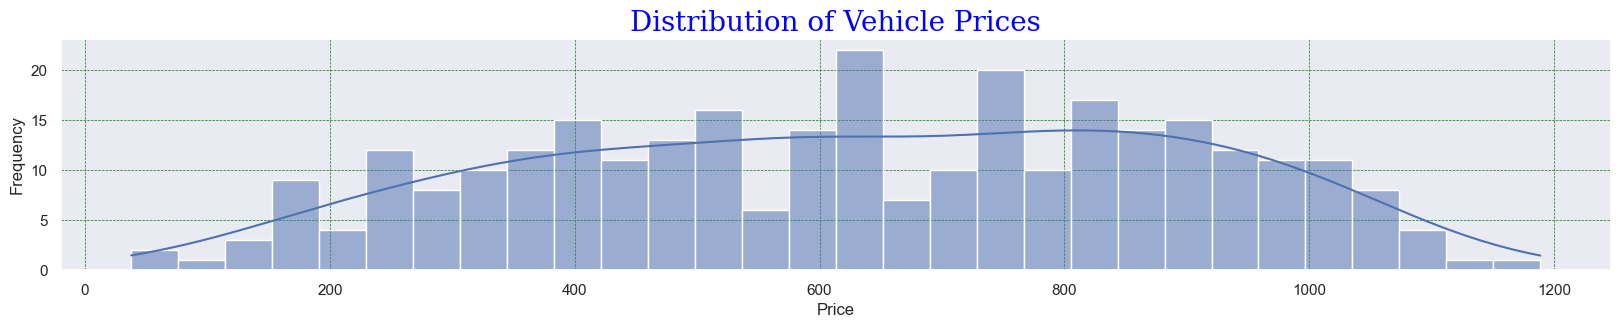

In [41]:
plt.figure(figsize=(20, 3))
sns.histplot(inner_merged_df["purchase_price"], bins=30, kde=True)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.title("Distribution of Vehicle Prices",fontdict={"family": "serif", "color": "blue", "size": 20},)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

<Figure size 2000x1200 with 0 Axes>

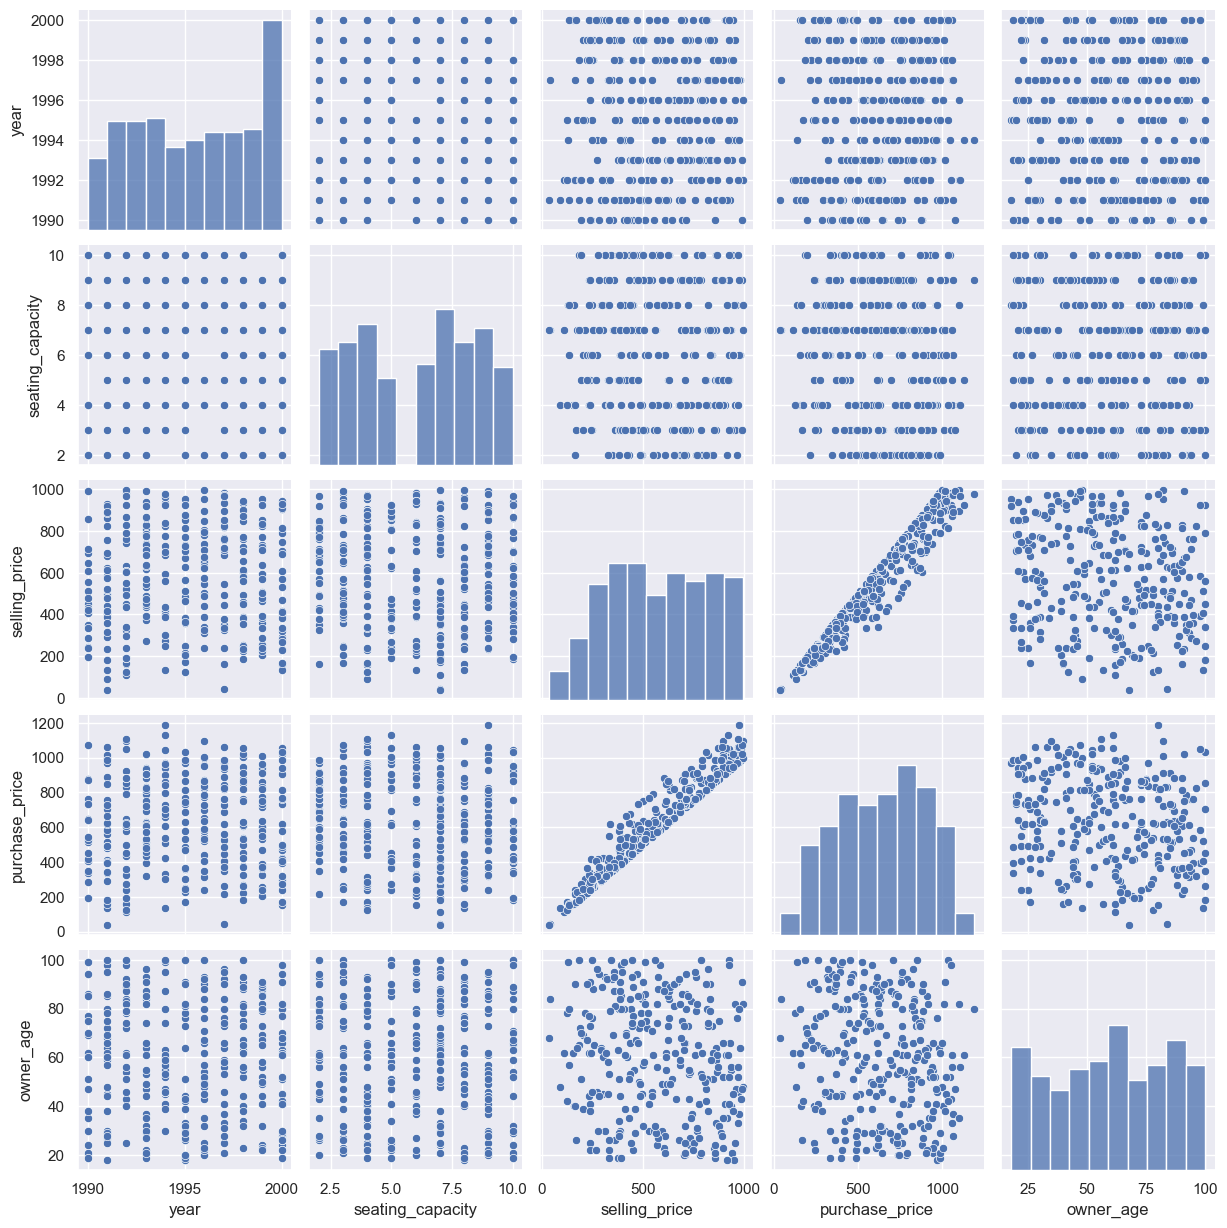

In [42]:
# Pairplot to see relationships between numerical features
plt.figure(figsize=(20, 12))
sns.pairplot(inner_merged_df[["year", "seating_capacity",'selling_price', "purchase_price", "owner_age"]])
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.show()

In [43]:
# Feature Engineering (if necessary)
inner_merged_df["purchase_year"] = inner_merged_df["purchase_date"].dt.year
# Calculate vehicle age
inner_merged_df["vehicle_age"] = 2024 - inner_merged_df["year"]

# Remove Unnecessary Columns
inner_merged_df.drop(columns=[ "purchase_date"], inplace=True,)
inner_merged_df.head(300)

,manufacturer,year,color,body_type,engine_type,transmission,fuel_type,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_profession,owner_age,owner_district,purchase_price,purchase_year,vehicle_age
0,Chevrolet,1999,orange,Convertible,electric,manual,biodiesel,7,84.65,active,256.19,agriculturalist,65,kigali_kicukiro,256.190002,2018,25
1,Toyota,1992,black,SUV,diesel,manual,hybrid,8,57.65,active,159.80,writer,40,west_karongi,159.800003,2005,32
2,Volkswagen,1991,blue,Wagon,diesel,automatic,hybrid,8,38.08,inactive,293.10,journalist,64,south_nyamagabe,293.100006,2019,33
3,Toyota,1994,gray,Hatchback,petrol,manual,gasoline,3,34.99,inactive,729.63,engineer,53,south_kamonyi,729.630005,2002,30
4,Audi,2000,metallic_silver,Sedan,petrol,manual,hydrogen,5,27.93,active,418.36,blacksmith,70,east_kirehe,418.359985,2018,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Volkswagen,1995,orange,Wagon,petrol,manual,ethanol,9,7.51,inactive,729.01,lawyer,43,south_muhoza,816.179993,2000,29
295,Mercedes,1998,gold,Wagon,electric,automatic,electric,2,65.57,active,704.82,biologist,73,east_gatsibo,866.109985,2013,26
296,Volkswagen,1995,metallic_gray,Truck,electric,manual,ethanol,2,95.64,active,814.13,plumber,90,west_ngororero,814.130005,2017,29
297,Chevrolet,1994,chrome,Van,petrol,manual,biodiesel,7,64.54,active,562.64,designer,100,east_kirehe,706.570007,2012,30


In [44]:
# Encode Categorical Features

#manual encoding
inner_merged_df['engine_type']=[0 if e_type.lower()=='petrol' else 1 if e_type.lower()=='diesel' else 2 for e_type in inner_merged_df['engine_type']]
inner_merged_df['transmission']=[0 if t_type.lower()=='automatic' else 1 for t_type in inner_merged_df['transmission']]
inner_merged_df['vehicle_condition_status']=[0 if vcs.lower()=='inactive' else 1 for vcs in inner_merged_df['vehicle_condition_status']]

#one hot encoding
inner_merged_df = pd.get_dummies(inner_merged_df, columns=[ "body_type", "fuel_type"], drop_first=True)

 #frequency encoding
for col in ["manufacturer", "color", "owner_profession", "owner_district"]:
    frequency = inner_merged_df[col].value_counts()
    inner_merged_df[col] = inner_merged_df[col].map(frequency)
    
    
# Check possible values after encoding process
inner_merged_df.head()

,manufacturer,year,color,engine_type,transmission,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_profession,...,body_type_Sedan,body_type_Truck,body_type_Van,body_type_Wagon,fuel_type_diesel,fuel_type_electric,fuel_type_ethanol,fuel_type_gasoline,fuel_type_hybrid,fuel_type_hydrogen
0,38,1999,15,2,1,7,84.65,1,256.19,4,...,False,False,False,False,False,False,False,False,False,False
1,33,1992,16,1,1,8,57.65,1,159.80,2,...,False,False,False,False,False,False,False,False,True,False
2,25,1991,24,1,0,8,38.08,0,293.10,1,...,False,False,False,True,False,False,False,False,True,False
3,33,1994,18,0,1,3,34.99,0,729.63,5,...,False,False,False,False,False,False,False,True,False,False
4,35,2000,16,0,1,5,27.93,1,418.36,6,...,True,False,False,False,False,False,False,False,False,True


In [45]:
# Define the target variable
target_column = "purchase_price"
# Automatically select input features (X) and output variable (Y)
input_data = inner_merged_df.drop(columns=[target_column])
output_data = inner_merged_df[target_column]

# Display the shapes of the split data
print("Input Data Shape (X):", input_data.shape)
print("Output Data Shape (Y):", output_data.shape)

Input Data Shape (X): (299, 27)
Output Data Shape (Y): (299,)


In [46]:
# Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data  = pd.DataFrame(ss.fit_transform(input_data),columns = input_data.columns)
input_data.head(2)

,manufacturer,year,color,engine_type,transmission,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_profession,...,body_type_Sedan,body_type_Truck,body_type_Van,body_type_Wagon,fuel_type_diesel,fuel_type_electric,fuel_type_ethanol,fuel_type_gasoline,fuel_type_hybrid,fuel_type_hydrogen
0,1.426969,1.233426,0.248511,1.235314,0.919608,0.390169,1.296981,0.983415,-1.283241,-0.173424,...,-0.431866,-0.398641,-0.333952,-0.387298,-0.404257,-0.381568,-0.404257,-0.40984,-0.442719,-0.392989
1,0.441603,-0.984410,0.501249,0.024301,0.919608,0.781647,0.354523,0.983415,-1.672388,-1.365463,...,-0.431866,-0.398641,-0.333952,-0.387298,-0.404257,-0.381568,-0.404257,-0.40984,2.258770,-0.392989


In [47]:
# Data Partitation
# Splitting the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data, output_data , test_size = 0.2, random_state = 42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (239, 27) (239,)
Testing set shape: (60, 27) (60,)


In [48]:
# Model Building
# As we know our target variable is continuous data so we will use regression technique.
# Linear Regression, Random Forest Regressor, Decision Tree Regressor, and Support Vector Regressor (SVR). 
# We trained each model using the training data and then tested how well they could predict car prices using both the training and testing data. 
# We used metrics like Root Mean Squared Error (RMSE) and R-squared values to see how accurate each model was. 
# This helped us understand which method worked best for predicting car prices accurately, benefiting decision-making in the automotive industry.
# Model 1- Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_rmse_lr = root_mean_squared_error(y_train, y_train_pred)
test_rmse_lr = root_mean_squared_error(y_test, y_test_pred)
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is :",lr.score(x_train,y_train)*100)
print("R squared for test is :", lr.score(x_test,y_test)*100)

Train RMSE: 63.18244212235024
Test RMSE: 72.00315298200776

R squared for train is : 94.21543169173717
R squared for test is : 92.31576149129641


In [49]:
# Model 2- Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_rmse_rf = root_mean_squared_error(y_train, y_train_pred)
test_rmse_rf = root_mean_squared_error(y_test, y_test_pred)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")
print("R squared for train is :",rf.score(x_train,y_train)*100)
print("R squared for test is :", rf.score(x_test,y_test)*100)

Train RMSE: 28.734880736797813
Test RMSE: 73.1838132006272

R squared for train is : 98.80354343954932
R squared for test is : 92.06169325768478


In [50]:
# Model 3- Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
train_rmse_dt = root_mean_squared_error(y_train, y_train_pred)
test_rmse_dt = root_mean_squared_error(y_test, y_test_pred)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(x_train,y_train)*100)
print("R squared for test is :", dt.score(x_test,y_test)*100)

Train RMSE: 0.0
Test RMSE: 106.69784264683736

R squared for train is : 100.0
R squared for test is : 83.12634814315541


In [51]:
# Model 4- SVR

from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)
train_rmse_svr = root_mean_squared_error(y_train, y_train_pred)
test_rmse_svr = root_mean_squared_error(y_test, y_test_pred)
print(f"Train RMSE: {train_rmse_svr}")
print(f"Test RMSE: {test_rmse_svr}\n")
print("R squared for train is :",svr.score(x_train,y_train)*100)
print("R squared for test is :", svr.score(x_test,y_test)*100)

Train RMSE: 260.07362792657887
Test RMSE: 257.7482520614432

R squared for train is : 1.9899141991900349
R squared for test is : 1.5333267955355723


In [52]:
# Step 4- Select the Model
# Then in next Step we Compare the RMSE and R square and find the best model
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(x_test,y_test)*100),
    "Random Forest": (test_rmse_rf, rf.score(x_test,y_test)*100),
    "Linear Regression": (test_rmse_lr, lr.score(x_test,y_test)*100),
    "Support Vector Regressor": (test_rmse_svr, svr.score(x_test,y_test)*100)
}

sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], x[1][1]), reverse=False)

print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

Models sorted by RMSE and R squared (Test Set):
Linear Regression: RMSE = 72.00315298200776, R squared = 92.31576149129641
Random Forest: RMSE = 73.1838132006272, R squared = 92.06169325768478
Decision Tree: RMSE = 106.69784264683736, R squared = 83.12634814315541
Support Vector Regressor: RMSE = 257.7482520614432, R squared = 1.5333267955355723

Best Model: Linear Regression
RMSE: 72.00315298200776
R squared: 92.31576149129641
